# PROJEKT MODELU KLASYFIKACYJNEGO PRZEWIDYWANIA STANU MIESZKAŃ NA PODSTAWIE #

## Extra Trees Classifier ##

### kwiecień 2025

In [4]:
import pandas as pd
from pycaret.classification import setup, pull, compare_models, plot_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import resample
import pymysql
from sqlalchemy import create_engine
import numpy as np
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# tą komórkę uruchom jeżeli bazę danych bierzesz np. z DBeaver, oracle developer itp.

#username = 'root'
#password = '1234'
#host = '127.0.0.1'
#port = 3306  
#database = 'projekt1'
#engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')

#df = pd.read_sql("SELECT * FROM saleflats", con=engine)

#engine.dispose()

In [3]:
# tę komórkę uruchom jeśli czerpiesz dane z pliku .csv
df = pd.read_csv('sale_2024_0.csv', sep=',')

In [4]:
df

,SaleId,OriginalId,PortalId,Title,Description,Area,Price,OfferPrice,RealPriceAfterRenovation,OriginalPrice,...,Archive,Location,VoivodeshipNumber,CountyNumber,CommunityNumber,KindNumber,RegionNumber,SubRegionNumber,StreetNumber,EncryptedId
0,88,NaN,14,Mieszkanie trzypokojowe na sprzedaż,Mieszkanie o powierzchni 73m2 znajduje się na ...,73.00,766500.0,NaN,NaN,NaN,...,NaN,"Podlaskie, Białystok, Bojary",20.0,61.0,1.0,1.0,922490.0,NaN,NaN,02TgImo1wm-Ra4zUQxoPBw==
1,99,NaN,19,Sprzedam mieszkanie na parterze 64.8m2 Białyst...,Sprzedam mieszkanie na parterze 64.8m2 w 3-pię...,64.80,540000.0,NaN,NaN,NaN,...,NaN,"Podlaskie, Białystok, Antoniuk",20.0,61.0,1.0,1.0,922426.0,NaN,NaN,D-NUdVbtN3_kIW7ExgXkvA==
2,115,NaN,3,"Mieszkanie bezczynszowe, 3 pokoje, 2 łazienki",SPRZEDAŻ WYŁĄCZNIE BEZPOŚREDNIA. Agencjom nier...,51.00,540000.0,NaN,NaN,NaN,...,NaN,"Podlaskie, Białystok, Bagnówka",20.0,61.0,1.0,1.0,922461.0,NaN,NaN,lmBSU1XiXLSLOq1yKSe2kA==
3,140,NaN,14,Mieszkanie trzypokojowe na sprzedaż,***Oferta bez prowizji biura i podatku PCC!***...,67.62,544000.0,NaN,NaN,NaN,...,NaN,"Podlaskie, Białystok, Ul. Józefa Karola Puchal...",20.0,61.0,1.0,1.0,922410.0,NaN,43141.0,HWachf5gb6Vq-sFYH4YWnA==
4,145,NaN,3,3 Pokoje- 48M2-Osiedle Dziesięciny,Przedstawiamy na sprzedaż 3 pokojowe mieszkani...,48.00,459000.0,NaN,NaN,NaN,...,NaN,"Podlaskie, Białystok, Ul. Dziesięciny",20.0,61.0,1.0,1.0,922410.0,NaN,4656.0,AWsmt4ZY0X7lNv-6fSCn9Q==
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133882,4418401,NaN,2,Mieszkanie na sprzedaż - 59 m² - 3 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,59.99,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYftiMRU9ErLfA6XOKdBw9jY=
1133883,4418402,NaN,2,Mieszkanie na sprzedaż - 41 m² - 2 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,41.23,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYa7D8z7yjun2jGP_aZIReN8=
1133884,4418404,NaN,2,Mieszkanie na sprzedaż - 49 m² - 3 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,49.09,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYf9eM73_U8S05NBjfLiez6E=
1133885,4418405,NaN,2,Mieszkanie na sprzedaż - 49 m² - 3 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,49.48,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYRXVZdKE7iJxxFPu0Bq0ikc=


In [5]:
# pobranie próbki 10 losowych wierszy
df.sample(10)

,SaleId,OriginalId,PortalId,Title,Description,Area,Price,OfferPrice,RealPriceAfterRenovation,OriginalPrice,...,Archive,Location,VoivodeshipNumber,CountyNumber,CommunityNumber,KindNumber,RegionNumber,SubRegionNumber,StreetNumber,EncryptedId
1070457,4303525,NaN,3,Casa Feliz Portowa | mieszkanie 3-pok. | M.05.02,3-pokojowe mieszkanie numer M.05.02 na 5. pięt...,63.09,NaN,NaN,NaN,NaN,...,NaN,"Małopolskie, Kraków, Kraków-podgórze, Zabłocie...",12.0,61.0,4.0,9.0,1067672.0,NaN,17217.0,VPbySXr-p4k-YzQtvOACfObaRshu3omO9IJePLIRnwA=
166356,1189754,NaN,3,1-pokojowe mieszkanie 39m2 + balkon i piwnica,Na sprzedaż mieszkanie w centrum Świdnika o po...,38.84,300000.0,NaN,NaN,NaN,...,NaN,"Lubelskie, Świdnicki, Świdnik",6.0,17.0,1.0,1.0,957146.0,NaN,NaN,3FGvLN5ejn_OjyPXE0hX7P3iHBMOAEyENYzl25gVGOY=
30013,187460,NaN,3,Atrakcyjne mieszkanie dwupoziomowe !!,Tylko w naszym biurze ! Oferujemy Państwu bard...,53.00,460000.0,NaN,NaN,NaN,...,NaN,"Kujawsko-pomorskie, Bydgoszcz, Czyżkówko",4.0,61.0,1.0,1.0,928481.0,NaN,NaN,LqWfa3_k_6WiQv5eGQHPUKqEhWzKrHJDlJ5H3ZyQS80=
154528,1098177,NaN,19,Mieszkanie M4 na Bielawach w Bydgoszczy,Serdecznie zapraszam do zapoznania się z wyjąt...,83.00,500000.0,NaN,NaN,540000.0,...,NaN,"Kujawsko-pomorskie, Bydgoszcz",4.0,61.0,NaN,NaN,NaN,NaN,NaN,_GODLaaA2xS0ZZrI1CYn-Ojdq9zykoRglLyNhCMTntA=
508728,2900694,NaN,3,Dębskiego / Do Wejścia / 3 Pokoje /,ZAPRASZAM DO SKŁADANIA OFERT CENOWYCH ! Mam pr...,50.00,740000.0,NaN,NaN,NaN,...,NaN,"Małopolskie, Kraków, Kraków-podgórze, Opatkowice",12.0,61.0,4.0,9.0,951126.0,NaN,NaN,H4ra12kDZ2nfT1wJDUBxRmDSFhxJitH2UJuyXKHVWIY=
372842,2470653,NaN,3,Okolice Kępy Mieszczańskiej.,ATRAKCYJNA OFERTA! Mieszkanie nieopodal Kępy M...,54.68,587000.0,NaN,NaN,NaN,...,NaN,"Dolnośląskie, Wrocław, Wrocław-stare Miasto, U...",2.0,64.0,5.0,9.0,986946.0,NaN,11607.0,KtI3-0TpDujAizHDiczV72M_a3KKvllm6VBpOMLzO-8=
230803,1670492,NaN,3,W samym centrum Krynicy Zdrój.,PO GRNERALNYM REMONCIE! w samym centrum Krynic...,43.00,499900.0,NaN,NaN,540000.0,...,NaN,"Małopolskie, Nowosądecki, Krynica-zdrój",12.0,10.0,7.0,4.0,NaN,NaN,NaN,oE5mYoj97_kz1kFlyENCse0vsAuLTfw8YUHtsCxqsbc=
600444,3102914,NaN,32,"Mieszkanie Sulechów, Sulechów",Ta wyjątkowa oferta dostępna tylko w naszym bi...,55.00,375000.0,NaN,NaN,NaN,...,NaN,"Lubuskie, Zielonogórski, Sulechów",8.0,9.0,6.0,4.0,NaN,NaN,NaN,0LSn9Ypg2aAyG9EBuHZ_ZTY_qkdVfWyqsbDtbsFdaZc=
1089518,4342215,NaN,3,Apartament z widokiem na Zatokę | 300 m od plaży,Apartament z widokiem na Zatokę | 300 m od pla...,69.00,1518000.0,1725000.0,2566666.67,NaN,...,NaN,"Pomorskie, Gdynia, Orłowo, Ul. Mestwina",22.0,62.0,1.0,1.0,934330.0,NaN,12623.0,Z07P4zUjv9TkqzbQHEklL1M2huDzuLZiYFPxfpKNvGc=
277830,1999412,NaN,17,Nowe mieszkanie ul. Strażacka,Zapraszamy do zapoznania się z ofertą 2-pokojo...,35.34,547770.0,NaN,NaN,NaN,...,NaN,"Dolnośląskie, Lubański, Świeradów-zdrój",2.0,10.0,2.0,1.0,936457.0,NaN,NaN,4-kWkh1Kn9QNs86fEDTmiph-FeyVMDlaeq9iV3jfYyE=


In [6]:
print(df.columns)

Index(['SaleId', 'OriginalId', 'PortalId', 'Title', 'Description', 'Area',
       'Price', 'OfferPrice', 'RealPriceAfterRenovation', 'OriginalPrice',
       'PricePerSquareMeter', 'NumberOfRooms', 'BuiltYear', 'Type',
       'BuildingType', 'BuildingCondition', 'OfferFrom', 'Floor', 'Floors',
       'TypeOfMarket', 'OwnerType', 'DateAddedToDatabase', 'DateAdded',
       'DateLastModification', 'DateLastRaises', 'NewestDate', 'AvailableFrom',
       'Link', 'Phone', 'MainImage', 'OtherImages', 'NumberOfDuplicates',
       'NumberOfRaises', 'NumberOfModifications', 'IsDuplicatePriceLower',
       'IsDuplicatePrivateOwner', 'Score', 'ScorePrecision', 'CommunityScore',
       'NumberOfCommunityComments', 'NumberOfCommunityOpinions', 'Archive',
       'Location', 'VoivodeshipNumber', 'CountyNumber', 'CommunityNumber',
       'KindNumber', 'RegionNumber', 'SubRegionNumber', 'StreetNumber',
       'EncryptedId'],
      dtype='object')


In [7]:
df['BuiltYear'] = pd.to_datetime(df['BuiltYear'], format='%Y', errors='coerce')

In [8]:
df_a = df.dropna(subset=['Description'])

In [9]:
df_a.isnull().sum()

SaleId                             0
OriginalId                   1125223
PortalId                           0
Title                              0
Description                        0
Area                            2077
Price                          53212
OfferPrice                   1043154
RealPriceAfterRenovation     1043154
OriginalPrice                1015114
PricePerSquareMeter            56195
NumberOfRooms                  13525
BuiltYear                     379005
Type                               0
BuildingType                  202788
BuildingCondition            1048333
OfferFrom                       5030
Floor                          56904
Floors                        499074
TypeOfMarket                   31709
OwnerType                     540943
DateAddedToDatabase                0
DateAdded                          0
DateLastModification          880033
DateLastRaises                827954
NewestDate                         0
AvailableFrom                1125223
L

In [10]:
df_b = df_a.dropna(subset=['Location'])

In [11]:
df_b.isnull().sum()

SaleId                             0
OriginalId                   1124683
PortalId                           0
Title                              0
Description                        0
Area                            2071
Price                          53153
OfferPrice                   1042614
RealPriceAfterRenovation     1042614
OriginalPrice                1014574
PricePerSquareMeter            56133
NumberOfRooms                  13494
BuiltYear                     378808
Type                               0
BuildingType                  202543
BuildingCondition            1047795
OfferFrom                       5030
Floor                          56828
Floors                        498541
TypeOfMarket                   31629
OwnerType                     540441
DateAddedToDatabase                0
DateAdded                          0
DateLastModification          879543
DateLastRaises                827486
NewestDate                         0
AvailableFrom                1124683
L

In [12]:
df_c = df_b.dropna(subset=['BuildingCondition'])

In [13]:
df_c.isnull().sum()

SaleId                           0
OriginalId                   76888
PortalId                         0
Title                            0
Description                      0
Area                            30
Price                         7036
OfferPrice                   31258
RealPriceAfterRenovation     31258
OriginalPrice                73440
PricePerSquareMeter           7138
NumberOfRooms                  165
BuiltYear                    19248
Type                             0
BuildingType                 15600
BuildingCondition                0
OfferFrom                        0
Floor                         1984
Floors                       13600
TypeOfMarket                   716
OwnerType                    30525
DateAddedToDatabase              0
DateAdded                        0
DateLastModification         68857
DateLastRaises               68330
NewestDate                       0
AvailableFrom                76888
Link                             0
Phone               

In [14]:
df_c

,SaleId,OriginalId,PortalId,Title,Description,Area,Price,OfferPrice,RealPriceAfterRenovation,OriginalPrice,...,Archive,Location,VoivodeshipNumber,CountyNumber,CommunityNumber,KindNumber,RegionNumber,SubRegionNumber,StreetNumber,EncryptedId
1037441,4236909,NaN,10,Mieszkanie na sprzedaż - 56 m² - 3 pokoje Wars...,NAJBARDZIEJ ZIELONA DZIELNICA Białołęka ma now...,56.52,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Warszawa, Białołęka, Grodzisk, Ul...",14.0,65.0,3.0,8.0,919447.0,NaN,1051.0,YNwIfRAf_6pTlpT4SzWIF1I945vZrxCmGc1kx-MElW4=
1037442,4236910,NaN,10,Mieszkanie na sprzedaż - 39 m² - 3 pokoje Wars...,NAJBARDZIEJ ZIELONA DZIELNICA Białołęka ma now...,39.44,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Warszawa, Białołęka, Grodzisk, Ul...",14.0,65.0,3.0,8.0,919447.0,NaN,1051.0,YNwIfRAf_6pTlpT4SzWIF2b3MhONsWHx4CM5o0osslE=
1037444,4236917,NaN,10,Mieszkanie na sprzedaż - 57 m² - 4 pokoje Wars...,NAJBARDZIEJ ZIELONA DZIELNICA Białołęka ma now...,57.72,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Warszawa, Białołęka, Grodzisk, Ul...",14.0,65.0,3.0,8.0,919447.0,NaN,1051.0,YNwIfRAf_6pTlpT4SzWIF5P7_4V7ShzJmmF8PHTVfng=
1037449,4236925,NaN,10,Mieszkanie na sprzedaż - 34 m² - 2 pokoje Wars...,NAJBARDZIEJ ZIELONA DZIELNICA Białołęka ma now...,34.69,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Warszawa, Białołęka, Grodzisk, Ul...",14.0,65.0,3.0,8.0,919447.0,NaN,1051.0,YNwIfRAf_6pTlpT4SzWIF-baRshu3omO9IJePLIRnwA=
1037450,4236928,NaN,10,Mieszkanie na sprzedaż - 37 m² - 2 pokoje Wars...,NAJBARDZIEJ ZIELONA DZIELNICA Białołęka ma now...,37.03,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Warszawa, Białołęka, Grodzisk, Ul...",14.0,65.0,3.0,8.0,919447.0,NaN,1051.0,YNwIfRAf_6pTlpT4SzWIF4_bCM8lJ876moazm9h2OAo=
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133882,4418401,NaN,2,Mieszkanie na sprzedaż - 59 m² - 3 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,59.99,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYftiMRU9ErLfA6XOKdBw9jY=
1133883,4418402,NaN,2,Mieszkanie na sprzedaż - 41 m² - 2 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,41.23,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYa7D8z7yjun2jGP_aZIReN8=
1133884,4418404,NaN,2,Mieszkanie na sprzedaż - 49 m² - 3 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,49.09,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYf9eM73_U8S05NBjfLiez6E=
1133885,4418405,NaN,2,Mieszkanie na sprzedaż - 49 m² - 3 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,49.48,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYRXVZdKE7iJxxFPu0Bq0ikc=


In [15]:
df_c['Description'] = df_c['Description'].str.slice(0, 3000)

In [16]:
# Przygotuj wektorizer z limitem
vectorizer = CountVectorizer(max_features=500)  # np. 500 najczęstszych słów
X_bow = vectorizer.fit_transform(df_c["Description"])

# Konwertuj do DataFrame
df_bow = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

# Dołącz do oryginalnych danych (z wyjątkiem kolumny Description)
df_c = df_c.drop(columns=['Description']).reset_index(drop=True)
df_bow = df_bow.reset_index(drop=True)
df_prepared = pd.concat([df_c, df_bow], axis=1)

In [17]:
exp = setup(
    data=df_prepared,
    target='BuildingCondition',
    session_id=1123,
    categorical_features=['BuildingType', 'Location'],
    keep_features=[ 
            'Description',
            'SaleId',
            'Score',
            'Type',
            'PricePerSquareMeter',
            'Price', 
            'Area', 
            'TypeOfMarket'
            ],
#    text_features=['Title'],
    date_features=['BuiltYear'],
    ordinal_features={
        'BuildingType': ['Pozostałe', 'Blok', 'Apartametowiec', 'Kamienica']
    },
    verbose=False
)
exp.dataset_transformed.sample(10)

,SaleId,PortalId,Title,Area,Price,OfferPrice,RealPriceAfterRenovation,OriginalPrice,PricePerSquareMeter,NumberOfRooms,...,zł,łazience,łazienka,łazienki,łączy,ściany,świetna,że,życia,BuildingCondition
3069,4244676.0,3.0,1-pokojowe mieszkanie 30m2 + balkon,30.090000,650857.502733,635122.556067,1.001286e+06,660128.153212,11855.934088,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1
52769,4367347.0,17.0,"Mieszkanie, ul. Holenderska",46.509998,381382.000000,635122.556067,1.001286e+06,660128.153212,8200.000000,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
53637,4368982.0,32.0,"Mieszkanie Gdańsk Stare Miasto, Ustronie Gdańsk",26.000000,264347.000000,267925.500000,3.738607e+05,660128.153212,10167.190430,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
57726,4378982.0,3.0,Lokal mieszkalny w domu wielorodzinnym,100.000000,299000.000000,635122.556067,1.001286e+06,660128.153212,2990.000000,4.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9160,4259339.0,3.0,Kalaminta | mieszkanie 2-pok. | 12_3,35.639999,339000.000000,335000.000000,3.463333e+05,660128.153212,9511.780273,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1
24143,4297537.0,3.0,"✨Gotowe, 2 Pokoje, Po Remoncie, 0% Prowizji✨",33.500000,319900.000000,307700.000000,6.039900e+05,321600.000000,9600.000000,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
60767,4386352.0,4.0,2-pokojowe mieszkanie na sprzedaż,37.000000,885000.000000,799000.000000,8.141917e+05,660128.153212,23918.919922,2.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
18523,4283164.0,3.0,2-pokojowe mieszkanie 38m2 + ogródek Bez Prowizji,38.939999,650857.502733,635122.556067,1.001286e+06,660128.153212,11855.934088,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
67771,4400927.0,10.0,Mieszkanie na sprzedaż - 37 m² - 2 pokoje Krak...,37.610001,650857.502733,635122.556067,1.001286e+06,660128.153212,11855.934088,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
55120,4372274.0,3.0,Mieszkanie 2-pokojowe z domkiem letniskowym.,47.000000,650000.000000,699500.000000,7.583330e+05,660128.153212,13829.790039,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [18]:
df_prepared.info

<bound method DataFrame.info of         SaleId  OriginalId  PortalId  \
0      4236909         NaN        10   
1      4236910         NaN        10   
2      4236917         NaN        10   
3      4236925         NaN        10   
4      4236928         NaN        10   
...        ...         ...       ...   
76883  4418401         NaN         2   
76884  4418402         NaN         2   
76885  4418404         NaN         2   
76886  4418405         NaN         2   
76887  4418406         NaN         2   

                                                   Title   Area  Price  \
0      Mieszkanie na sprzedaż - 56 m² - 3 pokoje Wars...  56.52    NaN   
1      Mieszkanie na sprzedaż - 39 m² - 3 pokoje Wars...  39.44    NaN   
2      Mieszkanie na sprzedaż - 57 m² - 4 pokoje Wars...  57.72    NaN   
3      Mieszkanie na sprzedaż - 34 m² - 2 pokoje Wars...  34.69    NaN   
4      Mieszkanie na sprzedaż - 37 m² - 2 pokoje Wars...  37.03    NaN   
...                                        

In [19]:
df_prepared[df_prepared.duplicated()]

,SaleId,OriginalId,PortalId,Title,Area,Price,OfferPrice,RealPriceAfterRenovation,OriginalPrice,PricePerSquareMeter,...,zostały,zł,łazience,łazienka,łazienki,łączy,ściany,świetna,że,życia


In [20]:
df_prepared.nunique()

SaleId        76888
OriginalId        0
PortalId         34
Title         56154
Area           8156
              ...  
łączy             5
ściany            9
świetna           5
że                6
życia             6
Length: 550, dtype: int64

In [21]:
df_prepared.isnull()

,SaleId,OriginalId,PortalId,Title,Area,Price,OfferPrice,RealPriceAfterRenovation,OriginalPrice,PricePerSquareMeter,...,zostały,zł,łazience,łazienka,łazienki,łączy,ściany,świetna,że,życia
0,False,True,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76883,False,True,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
76884,False,True,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
76885,False,True,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
76886,False,True,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [22]:
df_prepared.isnull().sum()

SaleId            0
OriginalId    76888
PortalId          0
Title             0
Area             30
              ...  
łączy             0
ściany            0
świetna           0
że                0
życia             0
Length: 550, dtype: int64

In [23]:
Q1 = df_prepared["Price"].quantile(0.25)
Q3 = df_prepared["Price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_prep_p = df_prepared[~((df_prepared["Price"] < lower_bound) | (df_prepared["Price"] > upper_bound))]

In [24]:
Q1 = df_prep_p["PricePerSquareMeter"].quantile(0.25)
Q3 = df_prep_p["PricePerSquareMeter"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_prep_a = df_prep_p[~((df_prep_p["PricePerSquareMeter"] < lower_bound) | (df_prep_p["PricePerSquareMeter"] > upper_bound))]

In [25]:
Q1 = df_prep_a["Area"].quantile(0.25)
Q3 = df_prep_a["Area"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_prepared2 = df_prep_a[~((df_prep_a["Area"] < lower_bound) | (df_prep_a["Area"] > upper_bound))]

In [26]:
df_prepared2["BuildingCondition"].value_counts(normalize=True)

BuildingCondition
DEVELOPER_STATE     0.475638
AFTER_RENOVATION    0.349426
GOOD                0.087849
FOR_RENOVATION      0.087087
Name: proportion, dtype: float64

In [27]:
df_prepared2.nunique()

SaleId        69597
OriginalId        0
PortalId         34
Title         50634
Area           6522
              ...  
łączy             5
ściany            8
świetna           5
że                6
życia             6
Length: 550, dtype: int64

In [28]:
unique_btype=df_prepared2['BuildingType'].unique()

unique_btype

array([nan, 'Apartamentowiec', 'Blok', 'Pozostałe', 'Kamienica'],
      dtype=object)

In [29]:
print(df_prepared2['BuildingCondition'].nunique())

4


In [30]:
df_prepared2.isnull().sum()

SaleId            0
OriginalId    69597
PortalId          0
Title             0
Area             29
              ...  
łączy             0
ściany            0
świetna           0
że                0
życia             0
Length: 550, dtype: int64

In [31]:
df_prepared3=df_prepared2.dropna(subset=['BuildingCondition'])

In [32]:
df_prepared3.loc[df_prepared3['TypeOfMarket'] == 'pierwotny', 'BuildingCondition'] = 'DEVELOPER_STATE'

In [33]:
df_prepared3['BuiltYear'] = pd.to_datetime(df_prepared3['BuiltYear'], format='%Y', errors='coerce')

In [34]:
df_prepared3.loc[df_prepared3['BuiltYear'].dt.year >= 2025, 'BuildingCondition'] = 'DEVELOPER_STATE'

In [35]:
df_prepared3 = df_prepared3[~((df_prepared3['Link'].str.contains('otodom', case=False, na=False)) & 
                              (df_prepared3['BuildingCondition'] == 'AFTER_RENOVATION'))]

In [36]:
unique_ctype=df_prepared3['BuildingCondition'].unique()

unique_ctype

array(['DEVELOPER_STATE', 'AFTER_RENOVATION', 'GOOD', 'FOR_RENOVATION'],
      dtype=object)

In [37]:
df_prepared3["BuildingCondition"].value_counts(normalize=True)

BuildingCondition
DEVELOPER_STATE     0.604848
AFTER_RENOVATION    0.184273
FOR_RENOVATION      0.108452
GOOD                0.102428
Name: proportion, dtype: float64

In [38]:
# DODANIE ZBALANSOWANIA
# Sprawdź ile rekordów ma każda klasa
class_counts = df_prepared3['BuildingCondition'].value_counts()
min_count = class_counts.min()

# Tworzymy zbalansowane próbki dla każdej klasy
dfs = []
for condition in class_counts.index:
    df_condition = df_prepared3[df_prepared3['BuildingCondition'] == condition]
    df_condition_downsampled = resample(df_condition, 
                                        replace=False, 
                                        n_samples=min_count, 
                                        random_state=42)
    dfs.append(df_condition_downsampled)

# Łączymy wszystkie klasy w jeden zbalansowany DataFrame
df_balanced = pd.concat(dfs).reset_index(drop=True)

In [39]:
df_balanced["BuildingCondition"].value_counts(normalize=True)

BuildingCondition
DEVELOPER_STATE     0.25
AFTER_RENOVATION    0.25
FOR_RENOVATION      0.25
GOOD                0.25
Name: proportion, dtype: float64

In [40]:
df_balanced

,SaleId,OriginalId,PortalId,Title,Area,Price,OfferPrice,RealPriceAfterRenovation,OriginalPrice,PricePerSquareMeter,...,zostały,zł,łazience,łazienka,łazienki,łączy,ściany,świetna,że,życia
0,4387084,NaN,3,HOT OFERTA ! Taras na 9 piętrze+ balkon/2 pokoje,39.00,599000.0,520000.0,656416.67,NaN,15358.97,...,0,0,0,0,0,0,0,0,0,0
1,4251084,NaN,3,"3 pokoje, DUŻY BALKON, WIDOKOWE, 4 piętro, winda",52.06,515394.0,387000.0,613666.67,NaN,9900.00,...,0,1,0,0,1,0,0,0,0,0
2,4399934,NaN,3,Nowe 3pok_Gotowe IX.25_Biuro Sprzedaży‼️Garaż,57.00,419197.0,397371.0,410091.00,NaN,7354.33,...,0,5,0,0,0,0,0,0,0,0
3,4272453,NaN,11,"Mieszkanie, Łódź, Widzew, Stoki, 31 m²",31.25,281250.0,379000.0,490478.33,NaN,9000.00,...,0,3,0,1,0,0,0,0,0,0
4,4414294,NaN,3,"2 pokojowe mieszkanie, Targówek",37.23,605000.0,579000.0,751939.33,NaN,16250.34,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22847,4366691,NaN,11,"Mieszkanie, Kraków, Podgórze, 35 m²",34.74,629000.0,NaN,NaN,NaN,18105.93,...,0,0,0,0,1,0,0,0,0,0
22848,4403913,NaN,11,"Mieszkanie, Dąbrowa Górnicza, 46 m²",45.60,299000.0,394001.0,428244.00,NaN,6557.02,...,0,1,0,1,0,0,0,0,0,0
22849,4405354,NaN,11,"Mieszkanie, Poznań, 73 m²",73.04,789000.0,914900.0,988959.00,NaN,10802.30,...,0,0,0,0,0,0,0,0,0,0
22850,4411303,NaN,17,"Mieszkanie, ul. Leśna Góra",62.10,835000.0,907304.5,959768.00,NaN,13446.05,...,0,0,0,1,0,0,1,0,0,0


In [41]:
unbalanced_exp = setup(
    data=df_balanced,
    target='BuildingCondition',
    session_id=1123,
    keep_features=[ 
            'Description',
            'SaleId',
             'Score',
             'Type',
             'PricePerSquareMeter',
             'Price', 
             'Area', 
             'TypeOfMarket',
             'Title'
            ],   
    categorical_features=['BuildingType', 'Location'],
    date_features=['BuiltYear'],
    ordinal_features={
#      'BuildingType': ['Pozostałe', 'Blok', 'Apartametowiec', 'Kamienica']
        'BuildingCondition': ['FOR_RENOVATION', 'GOOD', 'AFTER_RENOVATION', 'DEVELOPER_STATE']
    },
    verbose=False,

    ignore_features=[
        'RealPriceAfterRenovation',
#        'Title',
#        'Area', 
#        'Price', 
#        'PricePerSquareMeter',
#        'Type',
#        'Score',
#        'TypeOfMarket',
        'OfferPrice',
        'OriginalPrice',
        'OriginalId',
        'PortalId',
        'OfferFrom',
        'OwnerType',
        'DateAddedToDatabase',
        'DateAdded',
        'DateLastModification',
        'DateLastRaises',
        'NewestDate',
        'AvailableFrom',
        'Link',
        'Phone',
        'MainImage',
        'OtherImages',
        'NumberOfDuplicates',
        'NumberOfRaises',
        'NumberOfModifications',
        'IsDuplicatePriceLower',
        'IsDuplicatePrivateOwner',
        'ScorePrecision',
        'CommunityScore',
        'NumberOfCommunityComments',
        'NumberOfCommunityOpinions',
        'Archive',
        'VoivodeshipNumber',
        'CountyNumber',
        'CommunityNumber',
        'RegionNumber',
        'KindNumber',
        'SubRegionNumber',
        'StreetNumber',
        'EncryptedId',
        ],
         
       
)
best_unbalanced_model = unbalanced_exp.compare_models()
unbalanced_metrics_df = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7981,0.9363,0.7981,0.7978,0.7973,0.7308,0.7312,1.2820
dummy,Dummy Classifier,0.2498,0.5000,0.2498,0.0624,0.0999,0.0000,0.0000,0.2070


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\Ai\AppData\Local\miniconda3\envs\projekt1\Lib\site-packages\pycaret\internal\pycaret_experiment\supervised_experiment.py", line 794, in compare_models
    model, model_fit_time = self._create_model(**create_model_args)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ai\AppData\Local\miniconda3\envs\projekt1\Lib\site-packages\pycaret\internal\pycaret_experiment\supervised_experiment.py", line 1533, in _create_model
    model, model_fit_time, model_results, _ = self._create_model_with_cv(
                                              ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ai\AppData\Local\miniconda3\envs\projekt1\Lib\site-packages\pycaret\internal\pycaret_experiment\supervised_experiment.py", line 1126, in _create_model_with_cv
    scores = cross_validate(
             ^^^^^^^^^^^^^^^
  File "C:\Users\Ai\AppData\Local\miniconda3\envs\projekt1\Lib\site-packages\sklearn\util

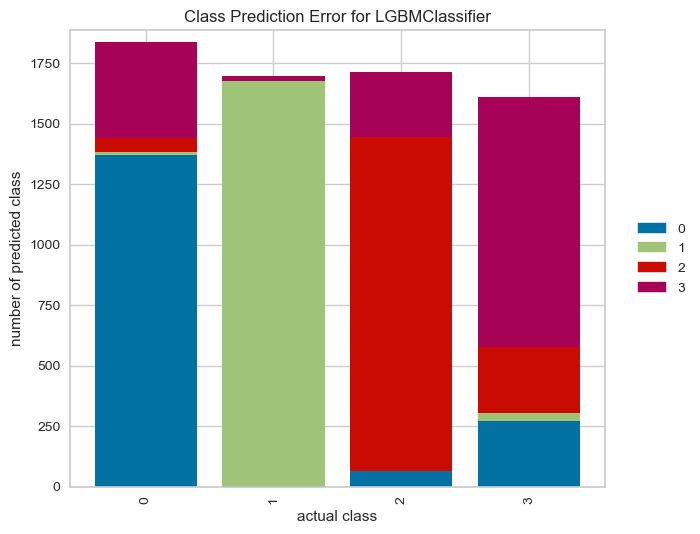

In [42]:
unbalanced_exp.plot_model(best_unbalanced_model, plot='error')

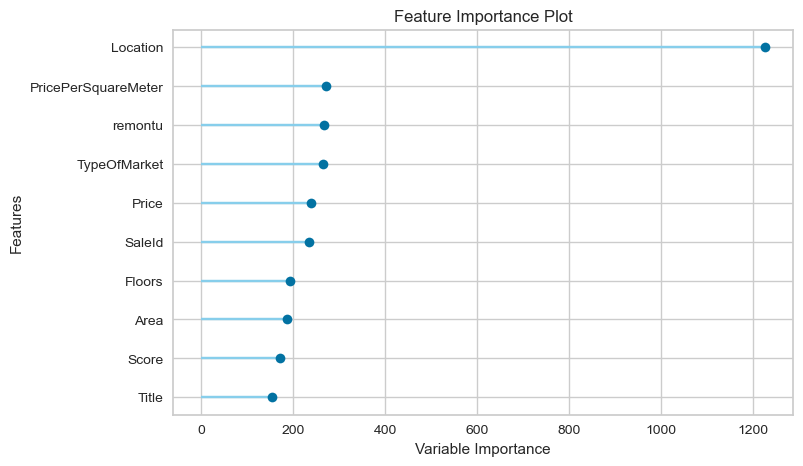

In [43]:
unbalanced_exp.plot_model(best_unbalanced_model, plot='feature')

In [44]:
tuned_model = unbalanced_exp.tune_model(best_unbalanced_model, n_iter=3, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8075,0.9400,0.8075,0.8096,0.8082,0.7433,0.7436
1,0.7725,0.9276,0.7725,0.7716,0.7718,0.6967,0.6969
2,0.7869,0.9279,0.7869,0.7880,0.7870,0.7158,0.7161
3,0.7775,0.9303,0.7775,0.7789,0.7774,0.7033,0.7039
4,0.7662,0.9240,0.7662,0.7660,0.7657,0.6883,0.6886
5,0.7856,0.9287,0.7856,0.7838,0.7843,0.7142,0.7144
6,0.7886,0.9357,0.7886,0.7877,0.7869,0.7182,0.7191
7,0.7936,0.9319,0.7936,0.7914,0.7921,0.7248,0.7251
8,0.7892,0.9363,0.7892,0.7898,0.7894,0.7190,0.7190


Fitting 10 folds for each of 3 candidates, totalling 30 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [45]:
best_model = unbalanced_exp.compare_models([best_unbalanced_model, tuned_model])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.7981,0.9363,0.7981,0.7978,0.7973,0.7308,0.7312,1.2420
1,Light Gradient Boosting Machine,0.7981,0.9363,0.7981,0.7978,0.7973,0.7308,0.7312,1.2900


In [46]:
unbalanced_exp.predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7954,0.9349,0.7954,0.7944,0.7945,0.7271,0.7274


,SaleId,Title,Area,Price,PricePerSquareMeter,NumberOfRooms,BuiltYear,Type,BuildingType,Floor,...,łazienka,łazienki,łączy,ściany,świetna,że,życia,BuildingCondition,prediction_label,prediction_score
11762,4290611,2 pokoje | 499 000 zł | Oferujemy pomoc w remo...,35.000000,499000.0,14257.139648,2.0,1980-01-01,Mieszkania,Blok,2.0,...,1,0,0,0,1,0,0,FOR_RENOVATION,FOR_RENOVATION,0.8334
21951,4294551,"Mieszkanie na sprzedaż, 64,00 m², 3 pokoje, 2 ...",64.000000,389000.0,6078.129883,3.0,1992-01-01,Mieszkania,Blok,2.0,...,0,0,0,0,0,0,0,GOOD,GOOD,0.9259
16710,4359780,"Mieszkanie, ul. Bydgoska",46.000000,295000.0,6413.040039,2.0,1970-01-01,Mieszkania,Blok,0.0,...,0,1,0,0,0,0,0,FOR_RENOVATION,GOOD,0.5379
4944,4314834,"Mieszkanie, Wrocław, Fabryczna, 64 m²",63.669998,788871.0,12390.000000,3.0,NaT,Mieszkania,NaN,2.0,...,0,0,0,0,0,0,0,DEVELOPER_STATE,DEVELOPER_STATE,0.9999
889,4368863,2-pokojowe mieszkanie 38m2 + balkon Bezpośrednio,38.110001,505202.0,13256.419922,2.0,2026-01-01,Mieszkania,NaN,4.0,...,0,0,0,0,0,0,0,DEVELOPER_STATE,DEVELOPER_STATE,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13229,4408452,"Mieszkanie, ul. 1 Sierpnia",47.000000,67900.0,1444.680054,3.0,NaT,Mieszkania,Blok,1.0,...,1,0,0,0,1,0,0,FOR_RENOVATION,FOR_RENOVATION,0.9800
5703,4363454,"4 pokoje, ogródek, 2 miejsca postojowe...",86.000000,729000.0,8476.740234,4.0,2025-01-01,Mieszkania,Pozostałe,0.0,...,2,0,0,0,1,0,0,DEVELOPER_STATE,DEVELOPER_STATE,1.0000
13312,4367627,Mieszkanie w centrum ul. Na Skałkach,47.400002,265000.0,5590.720215,1.0,1959-01-01,Mieszkania,Kamienica,2.0,...,1,0,0,0,0,0,0,FOR_RENOVATION,GOOD,0.3783
17845,4348800,3-pokojowe mieszkanie na sprzedaż,60.810001,637990.0,10491.530273,3.0,2014-01-01,Mieszkania,Blok,1.0,...,1,0,0,0,0,0,0,GOOD,AFTER_RENOVATION,0.7535


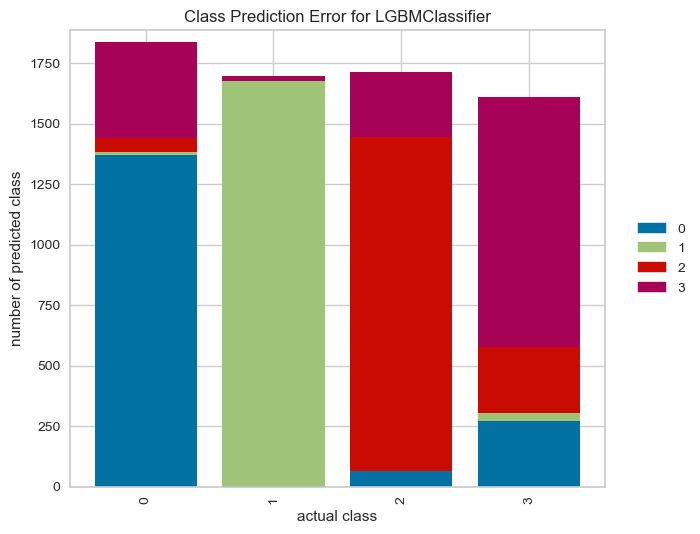

In [47]:
unbalanced_exp.plot_model(best_model, plot='error')

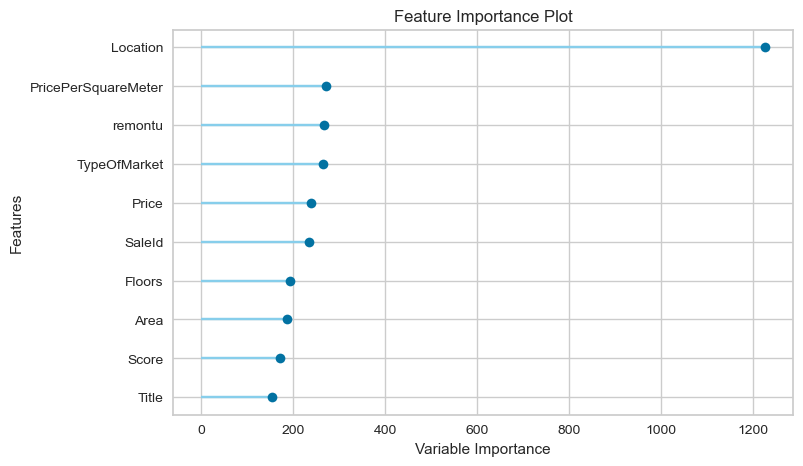

In [48]:
unbalanced_exp.plot_model(best_model, plot='feature')

In [49]:
best_tuned_model = unbalanced_exp.tune_model(
    best_model,
    optimize="F1",
    choose_better=True,
    fold=5,
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7881,0.9340,0.7881,0.7879,0.7879,0.7175,0.7176
1,0.7937,0.9282,0.7937,0.7946,0.7937,0.7249,0.7252
2,0.7831,0.9285,0.7831,0.7827,0.7827,0.7107,0.7108
3,0.8028,0.9357,0.8028,0.8014,0.8017,0.7370,0.7373
4,0.7912,0.9289,0.7912,0.7910,0.7907,0.7216,0.7219
Mean,0.7918,0.9310,0.7918,0.7915,0.7914,0.7223,0.7225
Std,0.0065,0.0032,0.0065,0.0063,0.0063,0.0087,0.0088


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [50]:
unbalanced_exp.predict_model(best_tuned_model).head(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7954,0.9349,0.7954,0.7944,0.7945,0.7271,0.7274


,SaleId,Title,Area,Price,PricePerSquareMeter,NumberOfRooms,BuiltYear,Type,BuildingType,Floor,...,łazienka,łazienki,łączy,ściany,świetna,że,życia,BuildingCondition,prediction_label,prediction_score
11762,4290611,2 pokoje | 499 000 zł | Oferujemy pomoc w remo...,35.000000,499000.0,14257.139648,2.0,1980-01-01,Mieszkania,Blok,2.0,...,1,0,0,0,1,0,0,FOR_RENOVATION,FOR_RENOVATION,0.8334
21951,4294551,"Mieszkanie na sprzedaż, 64,00 m², 3 pokoje, 2 ...",64.000000,389000.0,6078.129883,3.0,1992-01-01,Mieszkania,Blok,2.0,...,0,0,0,0,0,0,0,GOOD,GOOD,0.9259
16710,4359780,"Mieszkanie, ul. Bydgoska",46.000000,295000.0,6413.040039,2.0,1970-01-01,Mieszkania,Blok,0.0,...,0,1,0,0,0,0,0,FOR_RENOVATION,GOOD,0.5379
4944,4314834,"Mieszkanie, Wrocław, Fabryczna, 64 m²",63.669998,788871.0,12390.000000,3.0,NaT,Mieszkania,NaN,2.0,...,0,0,0,0,0,0,0,DEVELOPER_STATE,DEVELOPER_STATE,0.9999
889,4368863,2-pokojowe mieszkanie 38m2 + balkon Bezpośrednio,38.110001,505202.0,13256.419922,2.0,2026-01-01,Mieszkania,NaN,4.0,...,0,0,0,0,0,0,0,DEVELOPER_STATE,DEVELOPER_STATE,0.9999
9537,4391665,"Mieszkanie, Łódź, 47 m²",47.220001,387000.0,8195.679688,3.0,1978-01-01,Mieszkania,Blok,2.0,...,0,0,0,0,0,0,0,AFTER_RENOVATION,AFTER_RENOVATION,0.9589
7100,4347942,"Mieszkanie, ul. Grunwaldzka",82.000000,650000.0,7926.830078,3.0,1920-01-01,Mieszkania,Kamienica,2.0,...,0,1,0,0,0,0,0,AFTER_RENOVATION,AFTER_RENOVATION,0.8035
7581,4263481,"Mieszkanie, ul. Konopnickiej",45.380001,329005.0,7250.000000,2.0,1980-01-01,Mieszkania,Blok,1.0,...,0,0,0,0,0,1,0,AFTER_RENOVATION,AFTER_RENOVATION,0.7485
16951,4359949,"Mieszkanie, 32 m², Świniary",32.000000,285000.0,8906.250000,2.0,1950-01-01,Mieszkania,NaN,0.0,...,1,0,0,0,0,0,0,FOR_RENOVATION,FOR_RENOVATION,0.9213
19237,4336803,❗️Dodatkowy Rabat -1000 Zł/M2 Od Ceny Lokalu❗️,45.860001,560000.0,12211.080078,2.0,NaT,Mieszkania,Blok,7.0,...,1,0,0,0,0,0,0,GOOD,GOOD,0.8716


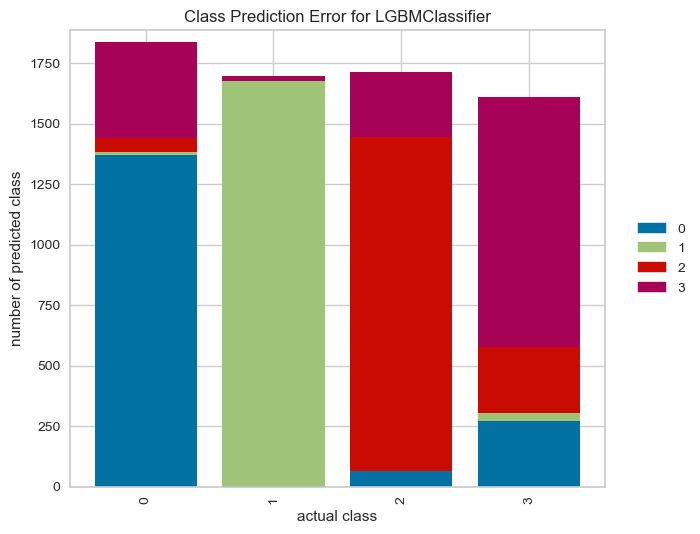

In [51]:
unbalanced_exp.plot_model(best_tuned_model, plot='error')

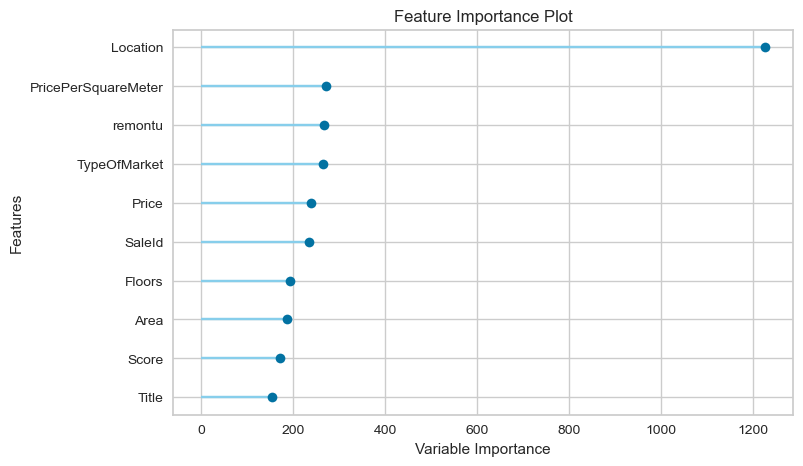

In [52]:
unbalanced_exp.plot_model(best_tuned_model, plot='feature')

In [53]:
best_final_model = unbalanced_exp.finalize_model(best_tuned_model)
best_final_model

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('date_feature_extractor',
                 TransformerWrapper(exclude=None, include=['BuiltYear'],
                                    transformer=ExtractDateTimeFeatures(features=['day',
                                                                                  'month',
                                                                                  'year']))),
                ('numerical_imputer',
                 TransformerWrapper(exclude=Non...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                random_state=1123, reg_alpha=0.0,
                                reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [54]:
unbalanced_exp.save_model(best_final_model, "0_best_buildingCond_model", verbose=False);

In [55]:
unbalanced_exp.predict_model(best_final_model).head(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8493,0.9610,0.8493,0.8492,0.8491,0.7991,0.7992


,SaleId,Title,Area,Price,PricePerSquareMeter,NumberOfRooms,BuiltYear,Type,BuildingType,Floor,...,łazienka,łazienki,łączy,ściany,świetna,że,życia,BuildingCondition,prediction_label,prediction_score
11762,4290611,2 pokoje | 499 000 zł | Oferujemy pomoc w remo...,35.000000,499000.0,14257.139648,2.0,1980-01-01,Mieszkania,Blok,2.0,...,1,0,0,0,1,0,0,FOR_RENOVATION,FOR_RENOVATION,0.9349
21951,4294551,"Mieszkanie na sprzedaż, 64,00 m², 3 pokoje, 2 ...",64.000000,389000.0,6078.129883,3.0,1992-01-01,Mieszkania,Blok,2.0,...,0,0,0,0,0,0,0,GOOD,GOOD,0.9277
16710,4359780,"Mieszkanie, ul. Bydgoska",46.000000,295000.0,6413.040039,2.0,1970-01-01,Mieszkania,Blok,0.0,...,0,1,0,0,0,0,0,FOR_RENOVATION,GOOD,0.6352
4944,4314834,"Mieszkanie, Wrocław, Fabryczna, 64 m²",63.669998,788871.0,12390.000000,3.0,NaT,Mieszkania,NaN,2.0,...,0,0,0,0,0,0,0,DEVELOPER_STATE,DEVELOPER_STATE,0.9999
889,4368863,2-pokojowe mieszkanie 38m2 + balkon Bezpośrednio,38.110001,505202.0,13256.419922,2.0,2026-01-01,Mieszkania,NaN,4.0,...,0,0,0,0,0,0,0,DEVELOPER_STATE,DEVELOPER_STATE,0.9999
9537,4391665,"Mieszkanie, Łódź, 47 m²",47.220001,387000.0,8195.679688,3.0,1978-01-01,Mieszkania,Blok,2.0,...,0,0,0,0,0,0,0,AFTER_RENOVATION,AFTER_RENOVATION,0.9747
7100,4347942,"Mieszkanie, ul. Grunwaldzka",82.000000,650000.0,7926.830078,3.0,1920-01-01,Mieszkania,Kamienica,2.0,...,0,1,0,0,0,0,0,AFTER_RENOVATION,AFTER_RENOVATION,0.6143
7581,4263481,"Mieszkanie, ul. Konopnickiej",45.380001,329005.0,7250.000000,2.0,1980-01-01,Mieszkania,Blok,1.0,...,0,0,0,0,0,1,0,AFTER_RENOVATION,AFTER_RENOVATION,0.7631
16951,4359949,"Mieszkanie, 32 m², Świniary",32.000000,285000.0,8906.250000,2.0,1950-01-01,Mieszkania,NaN,0.0,...,1,0,0,0,0,0,0,FOR_RENOVATION,FOR_RENOVATION,0.8977
19237,4336803,❗️Dodatkowy Rabat -1000 Zł/M2 Od Ceny Lokalu❗️,45.860001,560000.0,12211.080078,2.0,NaT,Mieszkania,Blok,7.0,...,1,0,0,0,0,0,0,GOOD,GOOD,0.8957


In [56]:
predictions = unbalanced_exp.predict_model(best_final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8493,0.9610,0.8493,0.8492,0.8491,0.7991,0.7992


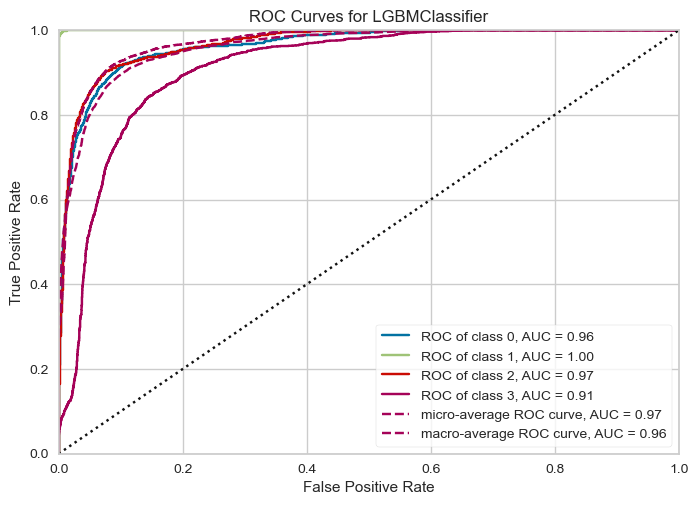

In [57]:
plot_model(best_final_model, plot="auc")

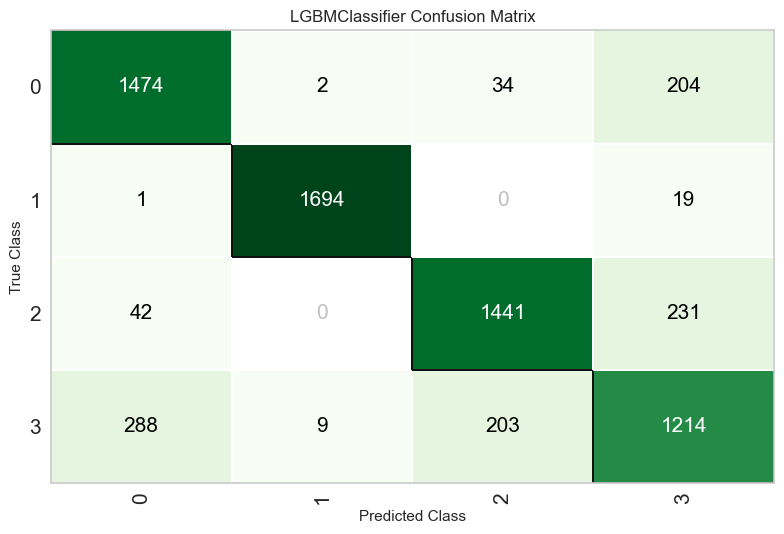

In [58]:
plot_model(best_final_model, plot="confusion_matrix")
# ile wartości z oryginalnego zbioru danych (True Class) algorytm zmienił na nową wartość po analizie(Predicted Class)
# np. 7 wartości oryginalnych o ocenie 1 zostało zmienionych na 0

## Confusion Matrix (Macierz pomyłek)

Confusion Matrix to tabela, która przedstawia liczbę poprawnych i niepoprawnych klasyfikacji dla każdej klasy. Ułatwia analizę, gdzie model popełnia błędy.

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| Actual Positive | True Positive (TP)  | False Negative (FN) |
| Actual Negative | False Positive (FP) | True Negative (TN)  |
 
Analiza macierzy pomyłek pozwala zrozumieć, które klasy są mylone przez model oraz jaki jest balans między różnymi rodzajami błędów.

<span style="color:red">Idealny model miałby same wartości na przekątnej (TP i TN) oraz zera poza nią.</span>

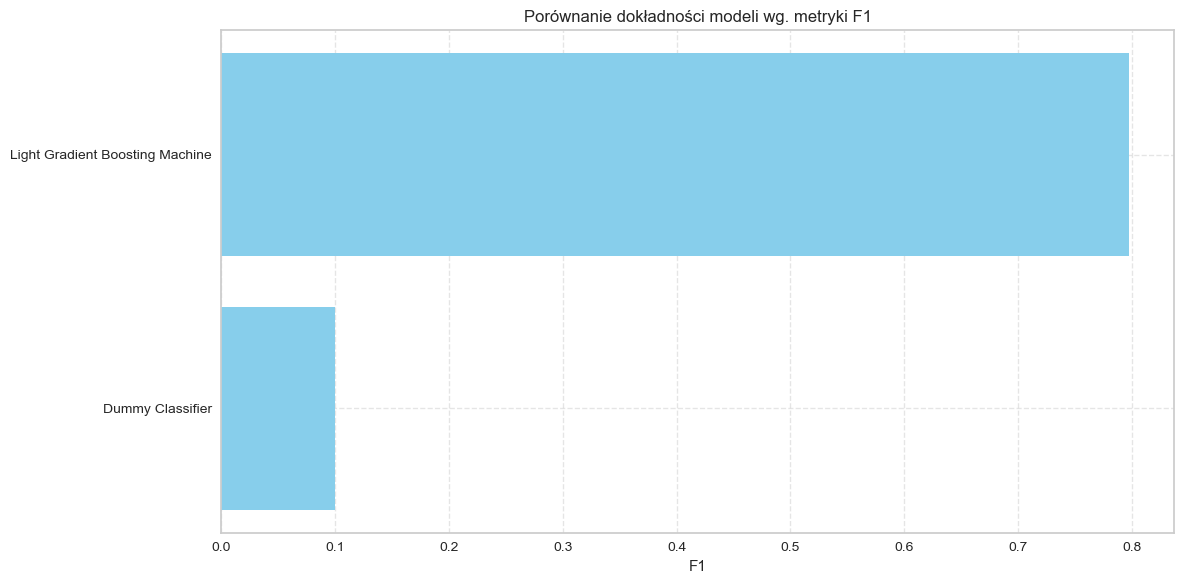

In [59]:
plt.figure(figsize=(12, 6))
plt.barh(unbalanced_metrics_df['Model'], unbalanced_metrics_df['F1'], color='skyblue')
plt.xlabel('F1')
plt.title('Porównanie dokładności modeli wg. metryki F1')
plt.gca().invert_yaxis()  # najlepszy model na górze
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [60]:
best_final_model.get_params()

{'memory': Memory(location=None),
 'steps': [('label_encoding',
   TransformerWrapperWithInverse(exclude=None, include=None,
                                 transformer=LabelEncoder())),
  ('date_feature_extractor',
   TransformerWrapper(exclude=None, include=['BuiltYear'],
                      transformer=ExtractDateTimeFeatures(features=['day', 'month',
                                                                    'year']))),
  ('numerical_imputer',
   TransformerWrapper(exclude=None,
                      include=['SaleId', 'Area', 'Price', 'PricePerSquareMeter',
                               'NumberOfRooms', 'Floor', 'Floors', 'Score', '00',
                               '000', '10', '100', '11', '12', '13', '14', '15',
                               '16', '17', '18', '20', '2025', '2026', '21', '25',
                               '30', '40', '48', '50', '60', ...],
                      transformer=SimpleImputer(add_indicator=False, copy=True,
                          

In [61]:
predicted_column = predictions['prediction_label']
print(predicted_column)

11762      FOR_RENOVATION
21951                GOOD
16710                GOOD
4944      DEVELOPER_STATE
889       DEVELOPER_STATE
               ...       
13229      FOR_RENOVATION
5703      DEVELOPER_STATE
13312                GOOD
17845    AFTER_RENOVATION
6312     AFTER_RENOVATION
Name: prediction_label, Length: 6856, dtype: object


In [62]:
df_last=predictions[['prediction_label','BuildingCondition', ]]

In [63]:
#df_last = df_last.reset_index()  
#print(df_last.columns) 

In [64]:
#df_last.rename(columns={'index': 'SaleId'}, inplace=True)

In [65]:
df_last.to_csv('0_sale_2024_stan.csv')

In [66]:
from pycaret.classification import load_model, predict_model

In [67]:
best_final_model = load_model("0_best_buildingCond_model")

Transformation Pipeline and Model Successfully Loaded


In [68]:
df_last

,prediction_label,BuildingCondition
11762,FOR_RENOVATION,FOR_RENOVATION
21951,GOOD,GOOD
16710,GOOD,FOR_RENOVATION
4944,DEVELOPER_STATE,DEVELOPER_STATE
889,DEVELOPER_STATE,DEVELOPER_STATE
...,...,...
13229,FOR_RENOVATION,FOR_RENOVATION
5703,DEVELOPER_STATE,DEVELOPER_STATE
13312,GOOD,FOR_RENOVATION
17845,AFTER_RENOVATION,GOOD


In [69]:
# 1. Wczytaj dane
df_raw = pd.read_csv("sale_2024_0.csv")

# 2. Zrób tymczasową kopię do predykcji — z placeholderami
df_predict = df_raw.copy()
df_predict["BuildingCondition"] = df_predict["BuildingCondition"].fillna(" ")

In [70]:
df_predict['BuiltYear'] = pd.to_datetime(df_predict['BuiltYear'], format='%Y', errors='coerce')

In [71]:
df_predict[['Title', 'Description']] = df_predict[['Title', 'Description']].fillna('')

In [ ]:
# 3. Setup z text_features (ważne!)
#exp = setup(
#    data=df_predict,
#    target='BuildingCondition',
#    session_id=1123,
#    categorical_features=['BuildingType', 'Location'],
#    text_features=['Title', 'Description'],
#    text_features_method='bow',
#    keep_features=['SaleId'],
#    date_features=['BuiltYear'],
#    ordinal_features={
#        'BuildingType': ['Pozostałe', 'Blok', 'Apartametowiec', 'Kamienica']
#    },
#    verbose=False
#)

In [72]:
# 1. Wyciągnij kolumny, które model zna
expected_cols = best_final_model.feature_names_in_

#  Napraw BuiltYear
df_raw['BuiltYear'] = pd.to_datetime(df_raw['BuiltYear'], errors='coerce')

# 2. Funkcja dopasowująca df_raw
def align_dataframe(df_raw, expected_cols):
    # Usuń 'BuildingCondition' z listy expected_cols
    expected_cols = [col for col in expected_cols if col != 'BuildingCondition']

    # Dodaj brakujące kolumny
    for col in expected_cols:
        if col not in df_raw.columns:
            df_raw[col] = 0  # albo NaN

    # Usuń BuildingCondition jeśli jest
    if 'BuildingCondition' in df_raw.columns:
        df_raw = df_raw.drop(columns=['BuildingCondition'])
    
    # Ustaw kolejność kolumn
    df_aligned = df_raw[expected_cols]

    return df_aligned

# 3. Użycie
df_aligned = align_dataframe(df_raw, expected_cols)

# 4. Predykcja
predictions = predict_model(best_final_model, data=df_aligned)

In [73]:
result = df_aligned.copy()
result['Prediction_State'] = predictions['prediction_label']

# 5. Wyświetl
print(result)

          SaleId                                              Title   Area  \
0             88                Mieszkanie trzypokojowe na sprzedaż  73.00   
1             99  Sprzedam mieszkanie na parterze 64.8m2 Białyst...  64.80   
2            115      Mieszkanie bezczynszowe, 3 pokoje, 2 łazienki  51.00   
3            140                Mieszkanie trzypokojowe na sprzedaż  67.62   
4            145                 3 Pokoje- 48M2-Osiedle Dziesięciny  48.00   
...          ...                                                ...    ...   
1133882  4418401  Mieszkanie na sprzedaż - 59 m² - 3 pokoje Grod...  59.99   
1133883  4418402  Mieszkanie na sprzedaż - 41 m² - 2 pokoje Grod...  41.23   
1133884  4418404  Mieszkanie na sprzedaż - 49 m² - 3 pokoje Grod...  49.09   
1133885  4418405  Mieszkanie na sprzedaż - 49 m² - 3 pokoje Grod...  49.48   
1133886  4418406  Mieszkanie na sprzedaż - 39 m² - 2 pokoje Grod...  39.36   

            Price  PricePerSquareMeter  NumberOfRooms  \
0     

In [74]:
# 1. Skopiuj oryginalne dane
final_result = df_raw.copy()

# 2. Usuń starą kolumnę BuildingCondition
if 'BuildingCondition' in final_result.columns:
    final_result = final_result.drop(columns=['BuildingCondition'])

# 3. Dodaj nową kolumnę z predykcją
final_result['Predicted_State'] = predictions['prediction_label']

# 4. Wyświetl efekt
final_result

,SaleId,OriginalId,PortalId,Title,Description,Area,Price,OfferPrice,RealPriceAfterRenovation,OriginalPrice,...,zł,łazience,łazienka,łazienki,łączy,ściany,świetna,że,życia,Predicted_State
0,88,NaN,14,Mieszkanie trzypokojowe na sprzedaż,Mieszkanie o powierzchni 73m2 znajduje się na ...,73.00,766500.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,AFTER_RENOVATION
1,99,NaN,19,Sprzedam mieszkanie na parterze 64.8m2 Białyst...,Sprzedam mieszkanie na parterze 64.8m2 w 3-pię...,64.80,540000.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,AFTER_RENOVATION
2,115,NaN,3,"Mieszkanie bezczynszowe, 3 pokoje, 2 łazienki",SPRZEDAŻ WYŁĄCZNIE BEZPOŚREDNIA. Agencjom nier...,51.00,540000.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,GOOD
3,140,NaN,14,Mieszkanie trzypokojowe na sprzedaż,***Oferta bez prowizji biura i podatku PCC!***...,67.62,544000.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,AFTER_RENOVATION
4,145,NaN,3,3 Pokoje- 48M2-Osiedle Dziesięciny,Przedstawiamy na sprzedaż 3 pokojowe mieszkani...,48.00,459000.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,GOOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133882,4418401,NaN,2,Mieszkanie na sprzedaż - 59 m² - 3 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,59.99,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,DEVELOPER_STATE
1133883,4418402,NaN,2,Mieszkanie na sprzedaż - 41 m² - 2 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,41.23,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,DEVELOPER_STATE
1133884,4418404,NaN,2,Mieszkanie na sprzedaż - 49 m² - 3 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,49.09,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,DEVELOPER_STATE
1133885,4418405,NaN,2,Mieszkanie na sprzedaż - 49 m² - 3 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,49.48,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,DEVELOPER_STATE


In [76]:
# 1. Wczytaj dane z pliku
df_raw = pd.read_csv("sale_2024_0.csv")

# 2. Dodaj kolumnę z predykcją do oryginalnego df_raw
df_raw['Predicted_State'] = predictions['prediction_label']

# 3. Wyświetl efekt
df_raw

,SaleId,OriginalId,PortalId,Title,Description,Area,Price,OfferPrice,RealPriceAfterRenovation,OriginalPrice,...,Location,VoivodeshipNumber,CountyNumber,CommunityNumber,KindNumber,RegionNumber,SubRegionNumber,StreetNumber,EncryptedId,Predicted_State
0,88,NaN,14,Mieszkanie trzypokojowe na sprzedaż,Mieszkanie o powierzchni 73m2 znajduje się na ...,73.00,766500.0,NaN,NaN,NaN,...,"Podlaskie, Białystok, Bojary",20.0,61.0,1.0,1.0,922490.0,NaN,NaN,02TgImo1wm-Ra4zUQxoPBw==,AFTER_RENOVATION
1,99,NaN,19,Sprzedam mieszkanie na parterze 64.8m2 Białyst...,Sprzedam mieszkanie na parterze 64.8m2 w 3-pię...,64.80,540000.0,NaN,NaN,NaN,...,"Podlaskie, Białystok, Antoniuk",20.0,61.0,1.0,1.0,922426.0,NaN,NaN,D-NUdVbtN3_kIW7ExgXkvA==,AFTER_RENOVATION
2,115,NaN,3,"Mieszkanie bezczynszowe, 3 pokoje, 2 łazienki",SPRZEDAŻ WYŁĄCZNIE BEZPOŚREDNIA. Agencjom nier...,51.00,540000.0,NaN,NaN,NaN,...,"Podlaskie, Białystok, Bagnówka",20.0,61.0,1.0,1.0,922461.0,NaN,NaN,lmBSU1XiXLSLOq1yKSe2kA==,GOOD
3,140,NaN,14,Mieszkanie trzypokojowe na sprzedaż,***Oferta bez prowizji biura i podatku PCC!***...,67.62,544000.0,NaN,NaN,NaN,...,"Podlaskie, Białystok, Ul. Józefa Karola Puchal...",20.0,61.0,1.0,1.0,922410.0,NaN,43141.0,HWachf5gb6Vq-sFYH4YWnA==,AFTER_RENOVATION
4,145,NaN,3,3 Pokoje- 48M2-Osiedle Dziesięciny,Przedstawiamy na sprzedaż 3 pokojowe mieszkani...,48.00,459000.0,NaN,NaN,NaN,...,"Podlaskie, Białystok, Ul. Dziesięciny",20.0,61.0,1.0,1.0,922410.0,NaN,4656.0,AWsmt4ZY0X7lNv-6fSCn9Q==,GOOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133882,4418401,NaN,2,Mieszkanie na sprzedaż - 59 m² - 3 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,59.99,NaN,NaN,NaN,NaN,...,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYftiMRU9ErLfA6XOKdBw9jY=,DEVELOPER_STATE
1133883,4418402,NaN,2,Mieszkanie na sprzedaż - 41 m² - 2 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,41.23,NaN,NaN,NaN,NaN,...,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYa7D8z7yjun2jGP_aZIReN8=,DEVELOPER_STATE
1133884,4418404,NaN,2,Mieszkanie na sprzedaż - 49 m² - 3 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,49.09,NaN,NaN,NaN,NaN,...,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYf9eM73_U8S05NBjfLiez6E=,DEVELOPER_STATE
1133885,4418405,NaN,2,Mieszkanie na sprzedaż - 49 m² - 3 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,49.48,NaN,NaN,NaN,NaN,...,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYRXVZdKE7iJxxFPu0Bq0ikc=,DEVELOPER_STATE


In [77]:
df_raw = df_raw[~((df_raw['Link'].str.contains('otodom', case=False, na=False)) & 
                              (df_raw['BuildingCondition'] == 'AFTER_RENOVATION'))]

In [78]:
df_raw["Predicted_State"].value_counts(normalize=True)

Predicted_State
GOOD                0.432906
DEVELOPER_STATE     0.316133
AFTER_RENOVATION    0.201249
FOR_RENOVATION      0.049712
Name: proportion, dtype: float64

In [80]:
df_raw

,SaleId,OriginalId,PortalId,Title,Description,Area,Price,OfferPrice,RealPriceAfterRenovation,OriginalPrice,...,Location,VoivodeshipNumber,CountyNumber,CommunityNumber,KindNumber,RegionNumber,SubRegionNumber,StreetNumber,EncryptedId,Predicted_State
0,88,NaN,14,Mieszkanie trzypokojowe na sprzedaż,Mieszkanie o powierzchni 73m2 znajduje się na ...,73.00,766500.0,NaN,NaN,NaN,...,"Podlaskie, Białystok, Bojary",20.0,61.0,1.0,1.0,922490.0,NaN,NaN,02TgImo1wm-Ra4zUQxoPBw==,AFTER_RENOVATION
1,99,NaN,19,Sprzedam mieszkanie na parterze 64.8m2 Białyst...,Sprzedam mieszkanie na parterze 64.8m2 w 3-pię...,64.80,540000.0,NaN,NaN,NaN,...,"Podlaskie, Białystok, Antoniuk",20.0,61.0,1.0,1.0,922426.0,NaN,NaN,D-NUdVbtN3_kIW7ExgXkvA==,AFTER_RENOVATION
2,115,NaN,3,"Mieszkanie bezczynszowe, 3 pokoje, 2 łazienki",SPRZEDAŻ WYŁĄCZNIE BEZPOŚREDNIA. Agencjom nier...,51.00,540000.0,NaN,NaN,NaN,...,"Podlaskie, Białystok, Bagnówka",20.0,61.0,1.0,1.0,922461.0,NaN,NaN,lmBSU1XiXLSLOq1yKSe2kA==,GOOD
3,140,NaN,14,Mieszkanie trzypokojowe na sprzedaż,***Oferta bez prowizji biura i podatku PCC!***...,67.62,544000.0,NaN,NaN,NaN,...,"Podlaskie, Białystok, Ul. Józefa Karola Puchal...",20.0,61.0,1.0,1.0,922410.0,NaN,43141.0,HWachf5gb6Vq-sFYH4YWnA==,AFTER_RENOVATION
4,145,NaN,3,3 Pokoje- 48M2-Osiedle Dziesięciny,Przedstawiamy na sprzedaż 3 pokojowe mieszkani...,48.00,459000.0,NaN,NaN,NaN,...,"Podlaskie, Białystok, Ul. Dziesięciny",20.0,61.0,1.0,1.0,922410.0,NaN,4656.0,AWsmt4ZY0X7lNv-6fSCn9Q==,GOOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133882,4418401,NaN,2,Mieszkanie na sprzedaż - 59 m² - 3 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,59.99,NaN,NaN,NaN,NaN,...,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYftiMRU9ErLfA6XOKdBw9jY=,DEVELOPER_STATE
1133883,4418402,NaN,2,Mieszkanie na sprzedaż - 41 m² - 2 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,41.23,NaN,NaN,NaN,NaN,...,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYa7D8z7yjun2jGP_aZIReN8=,DEVELOPER_STATE
1133884,4418404,NaN,2,Mieszkanie na sprzedaż - 49 m² - 3 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,49.09,NaN,NaN,NaN,NaN,...,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYf9eM73_U8S05NBjfLiez6E=,DEVELOPER_STATE
1133885,4418405,NaN,2,Mieszkanie na sprzedaż - 49 m² - 3 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,49.48,NaN,NaN,NaN,NaN,...,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYRXVZdKE7iJxxFPu0Bq0ikc=,DEVELOPER_STATE


In [81]:
df_raw.to_csv('0_sale_2024_stan_final.csv')

In [9]:
df1=pd.read_csv("0_sale_2024_stan_final.csv")

In [10]:
df2=df1.sample(10)

In [11]:
df2

,Unnamed: 0,SaleId,OriginalId,PortalId,Title,Description,Area,Price,OfferPrice,RealPriceAfterRenovation,...,Location,VoivodeshipNumber,CountyNumber,CommunityNumber,KindNumber,RegionNumber,SubRegionNumber,StreetNumber,EncryptedId,Predicted_State
389407,389407,2599656,NaN,11,"Mieszkanie, Kraków, Podgórze, 47 m²","Mieszkanie, Kraków, Podgórze, 47 m² Ogłoszenio...",46.84,800000.0,NaN,NaN,...,"Małopolskie, Kraków",12.0,61.0,NaN,NaN,NaN,NaN,NaN,P4errFEFwT5cCgGt55dtG8Nistz8W5OS33pqInx5rF4=,GOOD
423855,423855,2737191,NaN,17,Apartament Warszawa,Szukasz nowego mieszkania w spokojnej okolicy?...,57.20,907000.0,NaN,NaN,...,"Mazowieckie, Warszawa, Włochy",14.0,65.0,17.0,8.0,NaN,NaN,NaN,m1SGcBqgWxgXmEvn2LyAvjU3Kd3Q90EWIj30wWJnyNs=,DEVELOPER_STATE
841493,841493,3741461,NaN,3,Doskonała Inwestycja W Samym Sercu Starego Miasta,Na sprzedaż mieszkanie na jednej z najpiękniej...,47.25,930000.0,NaN,NaN,...,"Pomorskie, Gdańsk, Ul. Ogarna",22.0,61.0,1.0,1.0,933016.0,NaN,14808.0,mcrNi-XQ_cwCZPfs3absYRiYuI6Ji1Y6_AU2w0JIpzA=,GOOD
521941,521941,2925271,NaN,19,"3 pokoje, nowe, nie zamieszkałe, balkon, ładny...",Do sprzedaży mieszkanie po generalnym remoncie...,46.50,690000.0,NaN,NaN,...,"Małopolskie, Kraków, Kraków-nowa Huta, Bieńczyce",12.0,61.0,3.0,9.0,950724.0,NaN,NaN,KwtJdTsiPOl3Kr7rtqXbHXAQGFSZzeA3-gwVhOeGLN0=,GOOD
238201,238201,1741333,NaN,3,"Inowrocławska, 2 pokoje/balkon/klimatyzacja","::KONTAKT: Anna Kościńska, tel. 519 186 407 od...",50.97,630000.0,NaN,NaN,...,"Dolnośląskie, Wrocław, Wrocław-stare Miasto",2.0,64.0,5.0,9.0,986283.0,NaN,NaN,jkOmFHBUFtydO_GbYk6y7QAsOdtEx9lpXOO_vaDANMA=,AFTER_RENOVATION
667616,667616,3268786,NaN,3,Mielno kawalerka pod klucz umeblowana wyposażona,Na sprzedaż apartamentowa kawalerka z rynku pi...,25.90,247320.0,NaN,NaN,...,"Zachodniopomorskie, Koszaliński, Mielno",32.0,9.0,5.0,4.0,NaN,NaN,NaN,mb5yaHZevpxAymuTpq8fULC9zgjsgeFCftN87d07Wfg=,DEVELOPER_STATE
901998,901998,3897999,NaN,19,Mieszkanie 2 Pokojowe Osiedle Karpackie,"BIELSKO-BIAŁA, os. Karpackie Na sprzedaż 2 pok...",NaN,469000.0,NaN,NaN,...,"Śląskie, Bielsko-biała",24.0,61.0,NaN,NaN,NaN,NaN,NaN,HsDAR40jMDWqOnwvX7glDpgtwTGeq42piasdfG4vjEE=,GOOD
45770,45770,268099,NaN,11,"Mieszkanie, Sosnowiec, 43 m²","Mieszkanie, Sosnowiec, 43 m² Ogłoszeniodawca: ...",43.30,109000.0,NaN,NaN,...,"Śląskie, Sosnowiec",24.0,75.0,1.0,1.0,943428.0,NaN,NaN,STHCXe099rMjl2R7wHnxQcHwTUcnwlntkaF_UncrLhg=,AFTER_RENOVATION
312308,312308,2156524,NaN,19,"3 pok. mieszkanie 60, 33 m2 z pieknym widokiem...",Na sprzedaz przytulne mieszkanie w kolobrzegu ...,60.33,455000.0,NaN,NaN,...,"Zachodniopomorskie, Kołobrzeski, Kołobrzeg",32.0,8.0,1.0,1.0,950026.0,NaN,NaN,QANYtj1LHt9GImo8r4PiGtYR7TIe7My1iN2t6bD5Tu0=,GOOD
65687,65687,399917,NaN,3,Dobra lokalizacja 49m2 wolne od zaraz loggia w...,Ogłoszenie bezpośrednio od właściciela bez pro...,49.00,455000.0,NaN,NaN,...,"Kujawsko-pomorskie, Toruń, Rubinkowo",4.0,63.0,1.0,1.0,982902.0,NaN,NaN,F6dQNeAe8ieKZVaGwPDl93vBEfpLFJlhbk5PVEpmSvM=,GOOD


In [12]:
df2.to_csv('01_sample10.csv')